### <center>Аттестация. Практическое задание в Jupyter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований. Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах:

date - дата наблюдения
cum_power - накопленная (кумулятивная) выработка энергии на указанный день
То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [5]:
df = pd.read_csv('data/solarpower.csv')
df.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:
 

Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

In [6]:
missing_values_slice = df[df['cum_power'] == -1]

print(missing_values_slice.index)

# since we know that it is not the first element, and not the last element, we can execute the following
for i in missing_values_slice.index:
    df.iloc[i,1] = .5 * ( df.iloc[i-1,1] + df.iloc[i+1,1])

Int64Index([45, 647], dtype='int64')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [9]:
print(df["cum_power"].mean())

23848.246987951807


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

После чего создайте данные о ежемесячной выработке энергии на каждый год.

Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [10]:
df['day_power'] = df['cum_power'].diff()

In [11]:
df['date'] = pd.to_datetime(df['date'])

monthly_production = df.groupby(df['date'].dt.to_period('m')).sum()
monthly_production.index = monthly_production.index.to_series().astype(str)

C:\Users\Konstantin\AppData\Local\Temp\ipykernel_25104\1325186647.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_production = df.groupby(df['date'].dt.to_period('m')).sum()


In [12]:
print(monthly_production)

         cum_power  day_power
date                         
2017-01   624746.0       97.0
2017-02   567197.0      104.0
2017-03   633782.0      334.0
2017-04   626551.0      489.0
2017-05   663651.0      589.0
2017-06   662047.0      645.0
2017-07   702680.0      562.0
2017-08   718539.0      467.0
2017-09   707203.0      346.0
2017-10   739608.0      199.0
2017-11   719975.0       97.0
2017-12   745814.0       36.0
2018-01   747209.0       64.0
2018-02   678309.0      194.0
2018-03   758299.0      270.0
2018-04   744459.0      439.0
2018-05   787000.0      652.0
2018-06   778779.0      563.0
2018-07   825390.0      682.0
2018-08   844605.0      530.0
2018-09   830763.0      416.0
2018-10   728630.0      234.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график. Укажите в какие сезоны наблюдается подъем, а в какие спад?

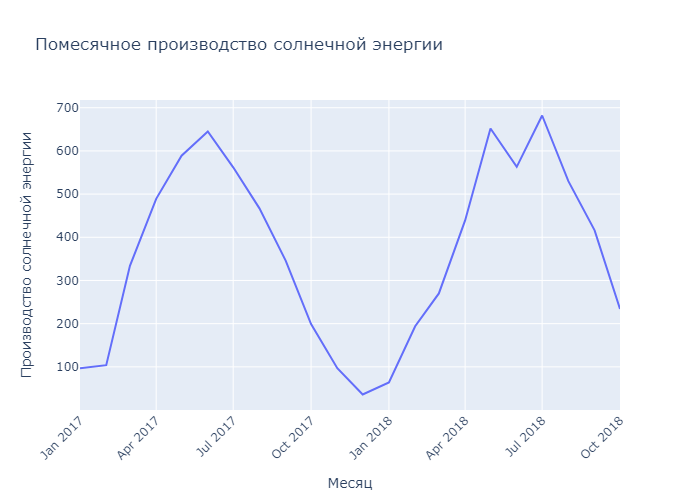

In [14]:
fig = px.line(monthly_production, y='day_power', title='Помесячное производство солнечной энергии')
fig.update_layout(xaxis_title='Месяц', yaxis_title='Производство солнечной энергии')
fig.update_xaxes(tickangle=-45)
fig.show()

**Вывод:**

**Собственно, как и ожидалось, зимой производится сильно меньше солнечной энергии. Больше всего электричества производится летом. Более длинные дни, больше солнечного света попадает на фотоэлементы.**

**Мы также наблюдаем небольшой спад летом 2018 года. Скорее всего это произошло из-за пожаров и сильного задымления в тот год.**